In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [5]:
df_article = pd.read_csv(r'C:\Users\siddh\OneDrive\Desktop\h-and-m-personalized-fashion-recommendations\articles.csv')
df_customer = pd.read_csv(r'C:\Users\siddh\OneDrive\Desktop\h-and-m-personalized-fashion-recommendations\customers.csv')
df_transaction = pd.read_csv(r'C:\Users\siddh\OneDrive\Desktop\h-and-m-personalized-fashion-recommendations\transactions_train.csv')

In [6]:
def describe_df(df):
    list_item = []
    for col in df.columns:
        list_item.append([
            col,
            df[col].dtype,
            df[col].isna().sum(),
            round(df[col].isna().sum()/len(df[col])*100, 2),
            df[col].nunique(),
            round(df[col].nunique()/len(df[col])*100, 2),
            list(df[col].unique()[:5])
        ])
    return pd.DataFrame(
        columns=['feature', 'type', '# null', '% null', '# unique', '% unique', 'sample'],
        data = list_item
    )




In [7]:
assert df_customer.customer_id.nunique() == df_customer.shape[0]
describe_df(df_customer)

,feature,type,# null,% null,# unique,% unique,sample
0,customer_id,object,0,0.00,1371980,100.00,[00000dbacae5abe5e23885899a1fa44253a17956c6d1c...
1,FN,float64,895050,65.24,1,0.00,"[nan, 1.0]"
2,Active,float64,907576,66.15,1,0.00,"[nan, 1.0]"
3,club_member_status,object,6062,0.44,3,0.00,"[ACTIVE, nan, PRE-CREATE, LEFT CLUB]"
4,fashion_news_frequency,object,16011,1.17,3,0.00,"[NONE, Regularly, nan, Monthly]"
5,age,float64,15861,1.16,84,0.01,"[49.0, 25.0, 24.0, 54.0, 52.0]"
6,postal_code,object,0,0.00,352899,25.72,[52043ee2162cf5aa7ee79974281641c6f11a68d276429...


Actions:
Filling NAs in following columns with their respective values
"FN":0, 

"Active": 0, 

"club_member_status": "N.C", 

"fashion_news_frequency": "N.C", 

"age": 0
 
 Dropping Postal Codes

In [8]:
mapping = {"FN": 0, "Active": 0, "club_member_status": "N.C", "fashion_news_frequency": "N.C", "age": 0}

df_customer.fillna(value=mapping, inplace=True)
df_customer.drop(columns="postal_code", inplace=True)

for col in ["FN", "age", "Active"]:
    df_customer[col] = df_customer[col].astype(np.int8)

In [9]:
assert df_customer.customer_id.nunique() == df_customer.shape[0]
describe_df(df_customer)

,feature,type,# null,% null,# unique,% unique,sample
0,customer_id,object,0,0.0,1371980,100.00,[00000dbacae5abe5e23885899a1fa44253a17956c6d1c...
1,FN,int8,0,0.0,2,0.00,"[0, 1]"
2,Active,int8,0,0.0,2,0.00,"[0, 1]"
3,club_member_status,object,0,0.0,4,0.00,"[ACTIVE, N.C, PRE-CREATE, LEFT CLUB]"
4,fashion_news_frequency,object,0,0.0,4,0.00,"[NONE, Regularly, N.C, Monthly]"
5,age,int8,0,0.0,85,0.01,"[49, 25, 24, 54, 52]"


In [10]:
df_customer.shape

(1371980, 6)

In [11]:
df_transaction.t_dat = pd.to_datetime(df_transaction.t_dat, infer_datetime_format=True)
describe_df(df_transaction)

,feature,type,# null,% null,# unique,% unique,sample
0,t_dat,datetime64[ns],0,0.0,734,0.00,"[2018-09-20 00:00:00, 2018-09-21 00:00:00, 201..."
1,customer_id,object,0,0.0,1362281,4.29,[000058a12d5b43e67d225668fa1f8d618c13dc232df0c...
2,article_id,int64,0,0.0,104547,0.33,"[663713001, 541518023, 505221004, 685687003, 6..."
3,price,float64,0,0.0,9857,0.03,"[0.0508305084745762, 0.0304915254237288, 0.015..."
4,sales_channel_id,int64,0,0.0,2,0.00,"[2, 1]"


In [12]:
assert df_article.article_id.nunique() == df_article.shape[0]
describe_df(df_article)

,feature,type,# null,% null,# unique,% unique,sample
0,article_id,int64,0,0.00,105542,100.00,"[108775015, 108775044, 108775051, 110065001, 1..."
1,product_code,int64,0,0.00,47224,44.74,"[108775, 110065, 111565, 111586, 111593]"
2,prod_name,object,0,0.00,45875,43.47,"[Strap top, Strap top (1), OP T-shirt (Idro), ..."
3,product_type_no,int64,0,0.00,132,0.13,"[253, 306, 304, 302, 273]"
4,product_type_name,object,0,0.00,131,0.12,"[Vest top, Bra, Underwear Tights, Socks, Leggi..."
5,product_group_name,object,0,0.00,19,0.02,"[Garment Upper body, Underwear, Socks & Tights..."
6,graphical_appearance_no,int64,0,0.00,30,0.03,"[1010016, 1010017, 1010001, 1010010, 1010019]"
7,graphical_appearance_name,object,0,0.00,30,0.03,"[Solid, Stripe, All over pattern, Melange, Tra..."
8,colour_group_code,int64,0,0.00,50,0.05,"[9, 10, 11, 12, 13]"
9,colour_group_name,object,0,0.00,50,0.05,"[Black, White, Off White, Light Beige, Beige]"


In [ ]:
#Dropping column 'detail_desc'
df_article.drop(columns='detail_desc',inplace=True)

KeyError: "['detail_desc'] not found in axis"

In [14]:
assert df_article.article_id.nunique() == df_article.shape[0]
describe_df(df_article)

,feature,type,# null,% null,# unique,% unique,sample
0,article_id,int64,0,0.0,105542,100.00,"[108775015, 108775044, 108775051, 110065001, 1..."
1,product_code,int64,0,0.0,47224,44.74,"[108775, 110065, 111565, 111586, 111593]"
2,prod_name,object,0,0.0,45875,43.47,"[Strap top, Strap top (1), OP T-shirt (Idro), ..."
3,product_type_no,int64,0,0.0,132,0.13,"[253, 306, 304, 302, 273]"
4,product_type_name,object,0,0.0,131,0.12,"[Vest top, Bra, Underwear Tights, Socks, Leggi..."
5,product_group_name,object,0,0.0,19,0.02,"[Garment Upper body, Underwear, Socks & Tights..."
6,graphical_appearance_no,int64,0,0.0,30,0.03,"[1010016, 1010017, 1010001, 1010010, 1010019]"
7,graphical_appearance_name,object,0,0.0,30,0.03,"[Solid, Stripe, All over pattern, Melange, Tra..."
8,colour_group_code,int64,0,0.0,50,0.05,"[9, 10, 11, 12, 13]"
9,colour_group_name,object,0,0.0,50,0.05,"[Black, White, Off White, Light Beige, Beige]"


Keeping only required columns

In [15]:
df_art_modified = df_article[['article_id','product_type_name','product_group_name','graphical_appearance_name','colour_group_name','index_name','section_name','garment_group_name']]

In [16]:
df_art_modified.head()

,article_id,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,index_name,section_name,garment_group_name
0,108775015,Vest top,Garment Upper body,Solid,Black,Ladieswear,Womens Everyday Basics,Jersey Basic
1,108775044,Vest top,Garment Upper body,Solid,White,Ladieswear,Womens Everyday Basics,Jersey Basic
2,108775051,Vest top,Garment Upper body,Stripe,Off White,Ladieswear,Womens Everyday Basics,Jersey Basic
3,110065001,Bra,Underwear,Solid,Black,Lingeries/Tights,Womens Lingerie,"Under-, Nightwear"
4,110065002,Bra,Underwear,Solid,White,Lingeries/Tights,Womens Lingerie,"Under-, Nightwear"


In [ ]:
#Converting to Datetime
df_transaction.t_dat = pd.to_datetime(df_transaction.t_dat, infer_datetime_format=True)
describe_df(df_transaction)

,feature,type,# null,% null,# unique,% unique,sample
0,t_dat,datetime64[ns],0,0.0,734,0.00,"[2018-09-20 00:00:00, 2018-09-21 00:00:00, 201..."
1,customer_id,object,0,0.0,1362281,4.29,[000058a12d5b43e67d225668fa1f8d618c13dc232df0c...
2,article_id,int64,0,0.0,104547,0.33,"[663713001, 541518023, 505221004, 685687003, 6..."
3,price,float64,0,0.0,9857,0.03,"[0.0508305084745762, 0.0304915254237288, 0.015..."
4,sales_channel_id,int64,0,0.0,2,0.00,"[2, 1]"


### To find most popular items in last 3 months

##### EDA on last 3 months of data 

In [ ]:
#Merging Transaction and Articles datasets
df = df_transaction.merge(df_art_modified,how='inner', on='article_id')
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,index_name,section_name,garment_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,Underwear body,Underwear,Solid,Black,Lingeries/Tights,Womens Lingerie,"Under-, Nightwear"
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,Bra,Underwear,Solid,Light Pink,Lingeries/Tights,Womens Lingerie,"Under-, Nightwear"
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,Sweater,Garment Upper body,Melange,Pink,Divided,Divided Selected,Knitwear
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,Sweater,Garment Upper body,Melange,Pink,Ladieswear,Womens Everyday Collection,Special Offers
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,Sweater,Garment Upper body,Melange,Dark Green,Ladieswear,Womens Everyday Collection,Special Offers


In [19]:
df.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_type_name', 'product_group_name', 'graphical_appearance_name',
       'colour_group_name', 'index_name', 'section_name',
       'garment_group_name'],
      dtype='object')

In [20]:
# Get the max date in the dataset
max_date = df['t_dat'].max()
max_date

Timestamp('2020-09-22 00:00:00')

In [21]:
# Filter for last 3 months
last_3_months = df[df['t_dat'] >= (max_date - pd.DateOffset(months=3))]
last_3_months.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,index_name,section_name,garment_group_name
27731532,2020-06-22,000346516dd355b40badca0c0f5f37a318ddae31f0e0f7...,816588001,0.022017,2,Top,Garment Upper body,Solid,Light Pink,Divided,Divided Collection,Jersey Fancy
27731533,2020-06-22,000346516dd355b40badca0c0f5f37a318ddae31f0e0f7...,669708001,0.016932,2,Blouse,Garment Upper body,Glittering/Metallic,Black,Divided,Divided Collection,Blouses
27731534,2020-06-22,0008a2dd68b9a347b6f6b6d567b48684d4a11e05a8b7cc...,811907001,0.012695,1,Bikini top,Swimwear,Other structure,Other Green,Lingeries/Tights,"Womens Swimwear, beachwear",Swimwear
27731535,2020-06-22,000f4d22ea7b4fc94704b3e6b7fb225b4f9dde7560cd38...,856332001,0.025814,2,Sandals,Shoes,All over pattern,Turquoise,Ladies Accessories,Womens Shoes,Shoes
27731536,2020-06-22,000f4d22ea7b4fc94704b3e6b7fb225b4f9dde7560cd38...,589748001,0.011610,2,Belt,Accessories,Solid,Black,Ladies Accessories,Womens Big accessories,Accessories


In [ ]:
# Count article popularity based on counts
top_articles = (
    last_3_months['article_id']
    .value_counts()
    .head(10)
    .reset_index()
)

In [23]:
top_articles

,article_id,count
0,751471001,5912
1,706016001,5865
2,372860002,4742
3,448509014,4514
4,610776002,4403
5,866383006,4149
6,730683050,4089
7,372860001,3931
8,783346001,3915
9,760084003,3801


In [24]:
# Get article metadata (first occurrence per article)
article_metadata = df.drop_duplicates(subset='article_id')[[
    'article_id', 'product_type_name', 'product_group_name',
    'graphical_appearance_name', 'colour_group_name', 'index_name',
    'section_name', 'garment_group_name'
]]

In [48]:
# Merge top articles with metadata
top_articles = top_articles.merge(article_metadata, on='article_id', how='left')

top_articles

AttributeError: 'list' object has no attribute 'merge'

Trousers is the most popular article that appeared 3 times in top 5

### Top 5 articlea in in each meta data category in last 3 months

In [26]:
# List of metadata columns
metadata_columns = [
    'product_type_name', 'product_group_name', 'graphical_appearance_name',
    'colour_group_name', 'index_name', 'section_name', 'garment_group_name'
]

# Compute popularity per article
article_counts = (
    last_3_months.groupby('article_id')
    .size()
    .reset_index(name='purchase_count')
)

# Add metadata by merging with original data (to get article attributes)
article_metadata = df.drop_duplicates('article_id')[
    ['article_id'] + metadata_columns
]
article_popularity = article_counts.merge(article_metadata, on='article_id', how='left')

In [27]:
# Get top 5 popular articles per metadata group
top_5_by_metadata = {}

for col in metadata_columns:
    top_items = (
        article_popularity.groupby(col)
        .apply(lambda x: x.sort_values(by='purchase_count', ascending=False).head(5))
        .reset_index(drop=True)[[col, 'article_id']]
    )
    top_5_by_metadata[col] = top_items

# Example output: top 5 articles per 'product_type_name'
print("Top 5 by product_type_name:")
print(top_5_by_metadata['product_type_name'])



Top 5 by product_type_name:
          product_type_name  article_id
0           Accessories set   858306003
1           Accessories set   858306006
2           Accessories set   858306002
3           Accessories set   755356001
4           Accessories set   858306005
..                      ...         ...
540  Wireless earphone case   916926006
541              Wood balls   850239001
542             Zipper head   852390001
543             Zipper head   852389001
544             Zipper head   852393001

[545 rows x 2 columns]


In [28]:
for col in metadata_columns:
    df_top = top_5_by_metadata[col]

    print(f"\n🔹 Insights for {col.replace('_', ' ').title()}:")
    print(f"  Number of unique article_ids in top 5 per group: {df_top['article_id'].nunique()}")

    # Top 3 metadata values with most frequent top articles
    top_values = df_top[col].value_counts().head(3)
    for val, count in top_values.items():
        print(f"   - '{val}' appeared in top 5 list of {count} groups")

    # Show which articles dominate a category
    most_frequent_articles = df_top['article_id'].value_counts().head(3)
    for art_id, freq in most_frequent_articles.items():
        print(f"   - Article ID {art_id} appeared in top 5 of {freq} different {col} groups")



🔹 Insights for Product Type Name:
  Number of unique article_ids in top 5 per group: 545
   - 'Accessories set' appeared in top 5 list of 5 groups
   - 'Alice band' appeared in top 5 list of 5 groups
   - 'Backpack' appeared in top 5 list of 5 groups
   - Article ID 858306003 appeared in top 5 of 1 different product_type_name groups
   - Article ID 858306006 appeared in top 5 of 1 different product_type_name groups
   - Article ID 858306002 appeared in top 5 of 1 different product_type_name groups

🔹 Insights for Product Group Name:
  Number of unique article_ids in top 5 per group: 82
   - 'Accessories' appeared in top 5 list of 5 groups
   - 'Bags' appeared in top 5 list of 5 groups
   - 'Cosmetic' appeared in top 5 list of 5 groups
   - Article ID 759465001 appeared in top 5 of 1 different product_group_name groups
   - Article ID 759482001 appeared in top 5 of 1 different product_group_name groups
   - Article ID 673396002 appeared in top 5 of 1 different product_group_name groups

1. Black, Blue and Biege are the most popular colurs in the last 3 months
2. Accessories are Bags are amongst top sold articles in last 3 months

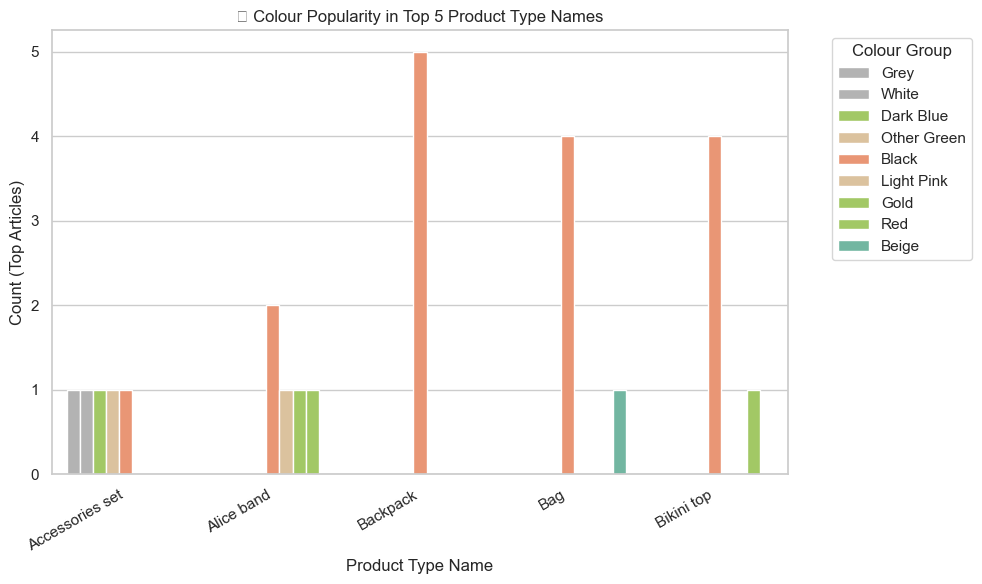

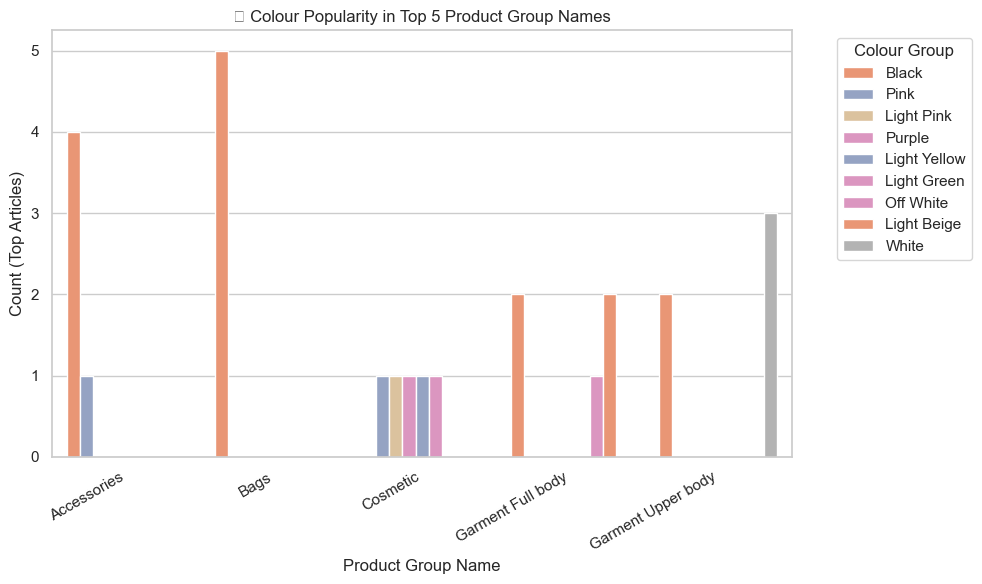

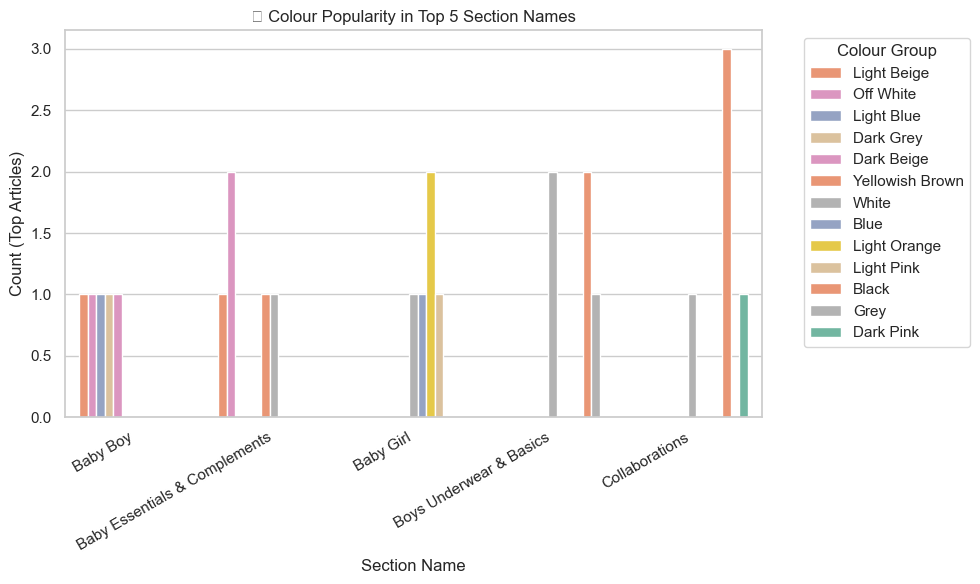

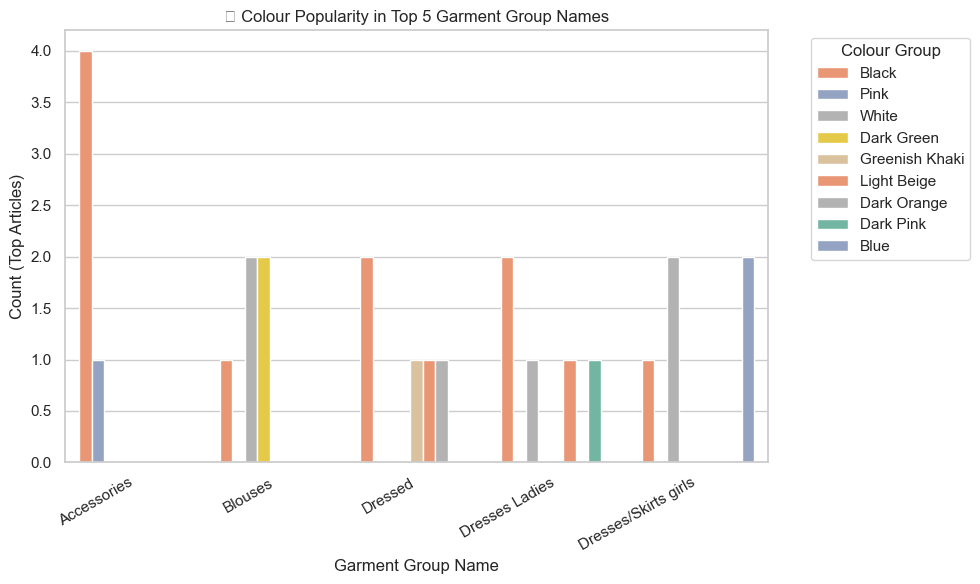

In [29]:
# Categories to analyze
selected_categories = ['product_type_name', 'product_group_name', 'section_name', 'garment_group_name']

# Merge all top 5 metadata DataFrames to find global top colour values
all_colour_data = pd.DataFrame()
for cat in selected_categories:
    df_cat = top_5_by_metadata[cat].merge(
        article_metadata[['article_id', 'colour_group_name']],
        on='article_id', how='left'
    )
    df_cat['category'] = cat
    all_colour_data = pd.concat([all_colour_data, df_cat], ignore_index=True)

# Get unique colour groups (sorted alphabetically for consistent color mapping)
unique_colours = sorted(all_colour_data['colour_group_name'].dropna().unique())

# Create a fixed color palette
palette = sns.color_palette("Set2", n_colors=len(unique_colours))
colour_mapping = dict(zip(unique_colours, palette))

# Set seaborn style
sns.set(style="whitegrid")

# Plot per category
for cat in selected_categories:
    df_plot = top_5_by_metadata[cat].merge(
        article_metadata[['article_id', 'colour_group_name']],
        on='article_id', how='left'
    )

    # Top 5 values in the category (by count)
    top5_vals = df_plot[cat].value_counts().nlargest(5).index
    df_plot = df_plot[df_plot[cat].isin(top5_vals)]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df_plot,
        x=cat,
        hue='colour_group_name',
        palette=colour_mapping,
        order=top5_vals
    )

    plt.title(f"🎨 Colour Popularity in Top 5 {cat.replace('_', ' ').title()}s")
    plt.xlabel(cat.replace('_', ' ').title())
    plt.ylabel("Count (Top Articles)")
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Colour Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



1. Black is most preferred color in top 5 Product Type Name

In [30]:
last_3_months = last_3_months.merge(df_customer,on='customer_id',how='inner')

In [31]:
last_3_months.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,index_name,section_name,garment_group_name,FN,Active,club_member_status,fashion_news_frequency,age
0,2020-06-22,000346516dd355b40badca0c0f5f37a318ddae31f0e0f7...,816588001,0.022017,2,Top,Garment Upper body,Solid,Light Pink,Divided,Divided Collection,Jersey Fancy,0,0,ACTIVE,NONE,25
1,2020-06-22,000346516dd355b40badca0c0f5f37a318ddae31f0e0f7...,669708001,0.016932,2,Blouse,Garment Upper body,Glittering/Metallic,Black,Divided,Divided Collection,Blouses,0,0,ACTIVE,NONE,25
2,2020-06-22,0008a2dd68b9a347b6f6b6d567b48684d4a11e05a8b7cc...,811907001,0.012695,1,Bikini top,Swimwear,Other structure,Other Green,Lingeries/Tights,"Womens Swimwear, beachwear",Swimwear,0,0,ACTIVE,NONE,19
3,2020-06-22,000f4d22ea7b4fc94704b3e6b7fb225b4f9dde7560cd38...,856332001,0.025814,2,Sandals,Shoes,All over pattern,Turquoise,Ladies Accessories,Womens Shoes,Shoes,1,1,ACTIVE,Regularly,27
4,2020-06-22,000f4d22ea7b4fc94704b3e6b7fb225b4f9dde7560cd38...,589748001,0.011610,2,Belt,Accessories,Solid,Black,Ladies Accessories,Womens Big accessories,Accessories,1,1,ACTIVE,Regularly,27


In [32]:
last_3_months.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_type_name', 'product_group_name', 'graphical_appearance_name',
       'colour_group_name', 'index_name', 'section_name', 'garment_group_name',
       'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age'],
      dtype='object')

In [33]:
# Create age group bins
age_bins = [0, 10, 20, 30, 40, 50, 200]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
last_3_months['age_group'] = pd.cut(last_3_months['age'], bins=age_bins, labels=age_labels, right=False)



# Count article purchases per age group
article_counts = (
    last_3_months.groupby(['age_group', 'article_id'])
    .size()
    .reset_index(name='purchase_count')
)

# Get Top 5 articles in each age group
top5_per_age_group = (
    article_counts.sort_values(['age_group', 'purchase_count'], ascending=[True, False])
    .groupby('age_group')
    .head(5)
    .reset_index(drop=True)
)

print(top5_per_age_group)

   age_group  article_id  purchase_count
0       0-10   706016001              35
1       0-10   778064001              25
2       0-10   599580038              24
3       0-10   610776002              23
4       0-10   160442010              21
5      10-20   759871002             443
6      10-20   759871025             430
7      10-20   706016001             416
8      10-20   733749001             337
9      10-20   448509014             336
10     20-30   706016001            3201
11     20-30   448509014            2717
12     20-30   751471001            2570
13     20-30   866383006            2534
14     20-30   372860002            2325
15     30-40   730683050             934
16     30-40   610776002             922
17     30-40   768912001             905
18     30-40   841383002             793
19     30-40   866731001             749
20     40-50   751471001             917
21     40-50   706016001             748
22     40-50   372860002             744
23     40-50   7

In [34]:
top5_with_meta = top5_per_age_group.merge(
    last_3_months.drop_duplicates('article_id')[
        ['article_id', 'product_type_name', 'colour_group_name']
    ],
    on='article_id',
    how='left'
)

In [35]:
top5_with_meta.head()

,age_group,article_id,purchase_count,product_type_name,colour_group_name
0,0-10,706016001,35,Trousers,Black
1,0-10,778064001,25,T-shirt,Black
2,0-10,599580038,24,Swimwear bottom,Red
3,0-10,610776002,23,T-shirt,Black
4,0-10,160442010,21,Socks,White


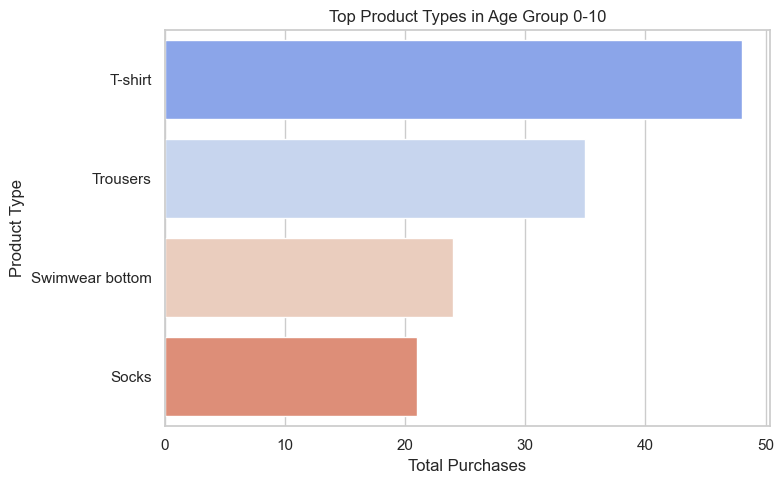

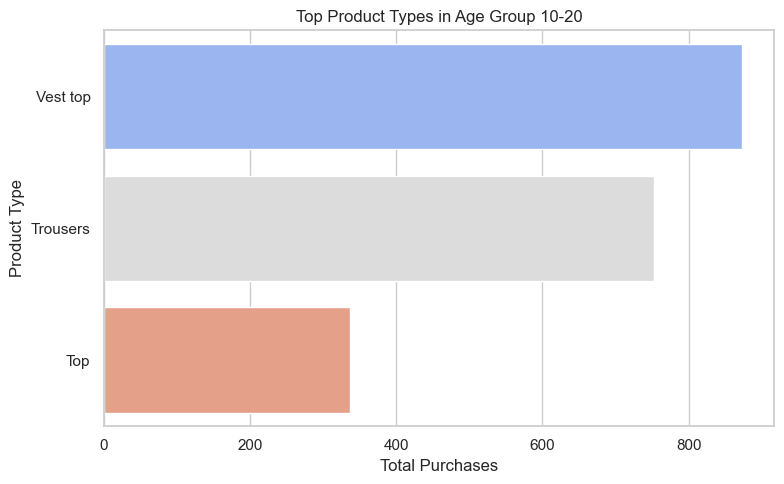

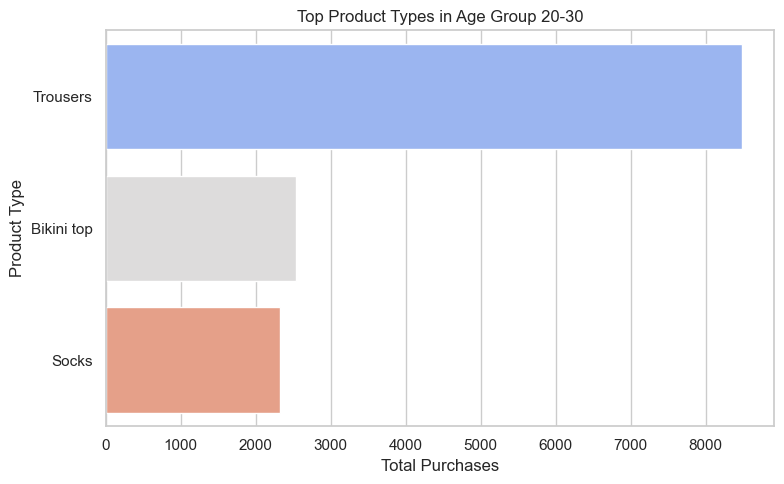

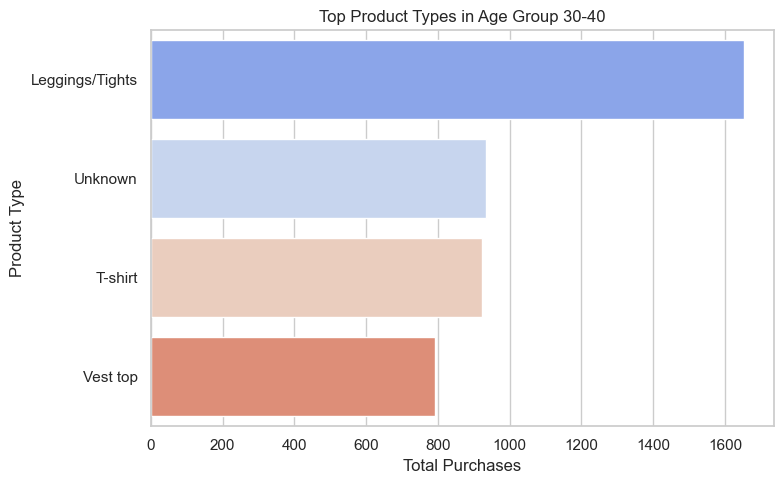

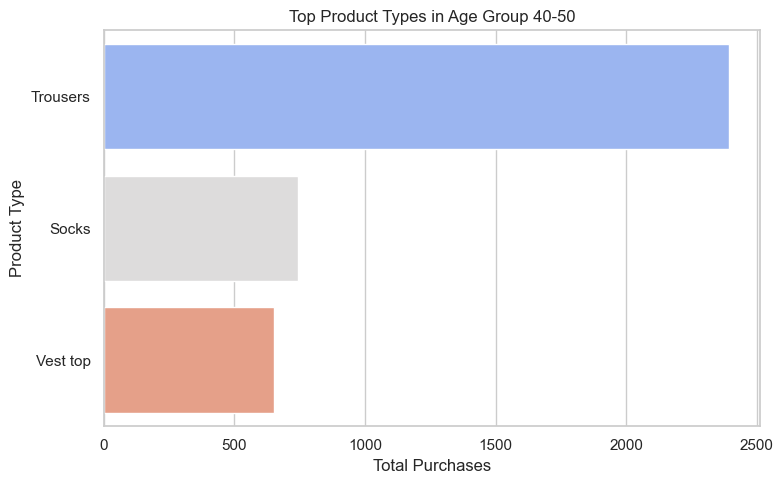

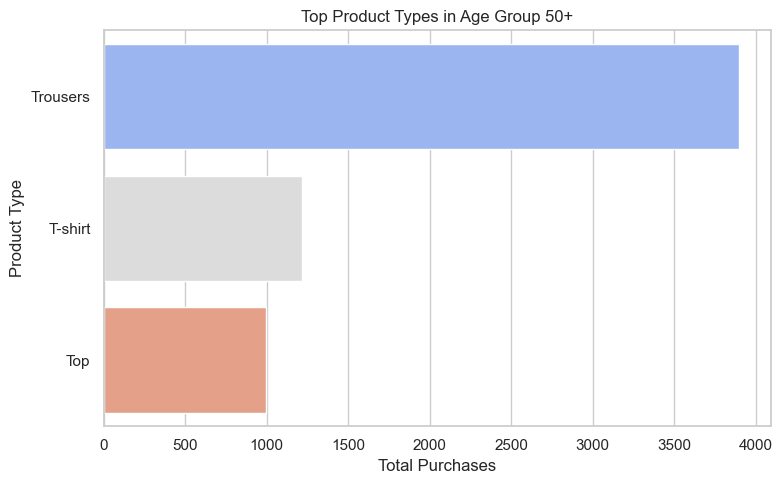

In [36]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot: One chart per age group
age_groups = top5_with_meta['age_group'].unique()

for age in age_groups:
    # Filter data for the age group
    df_age = top5_with_meta[top5_with_meta['age_group'] == age]

    # Group by product type and sum purchase counts
    top_types = (
        df_age.groupby('product_type_name')['purchase_count']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .reset_index()
    )

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=top_types,
        x='purchase_count',
        y='product_type_name',
        palette='coolwarm'
    )

    plt.title(f"Top Product Types in Age Group {age}")
    plt.xlabel("Total Purchases")
    plt.ylabel("Product Type")
    plt.tight_layout()
    plt.show()


People with age > 40 mostly prefer to buy Trausers from HNM and the major reason for this could be the comfort
People with age between 30 to 40 goes for Leggings or tights, while People in the age group 20-30 are also going for traousers followed by Bikini Top.
Customers in the age group 10-20 go for Vest tops, followed by trausers

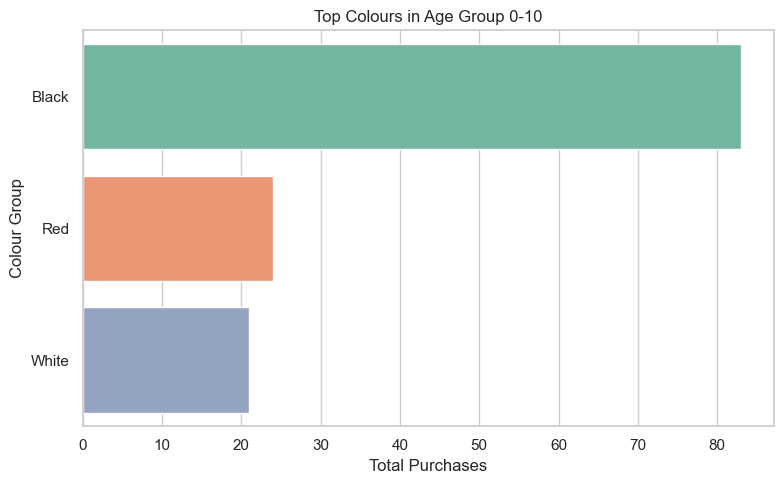

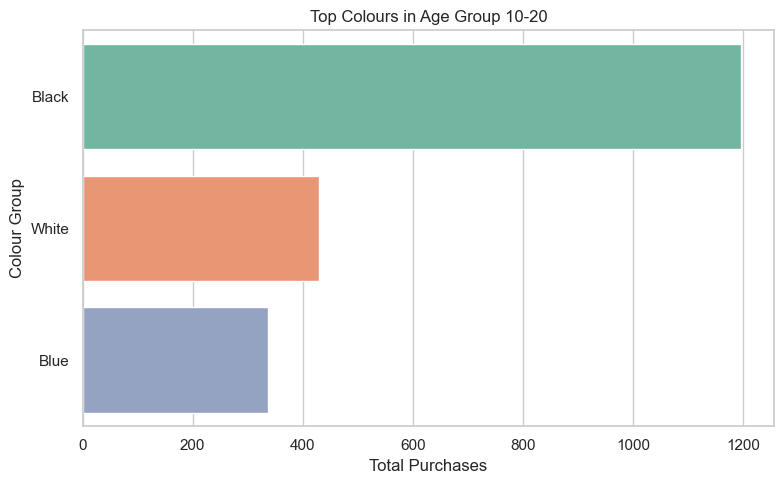

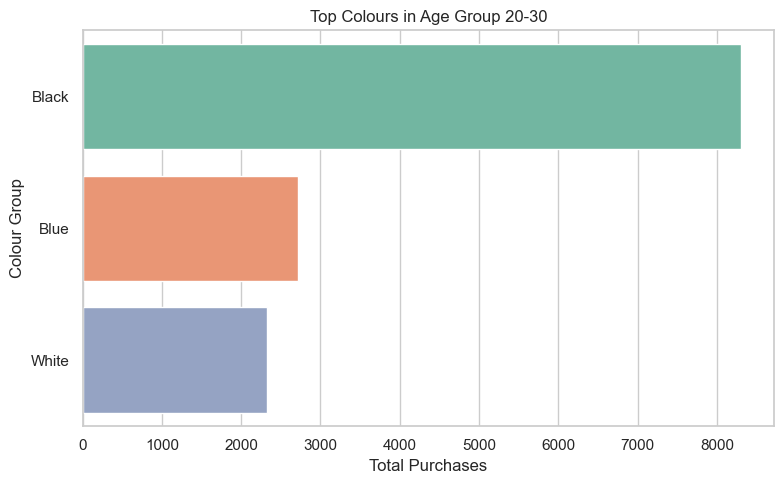

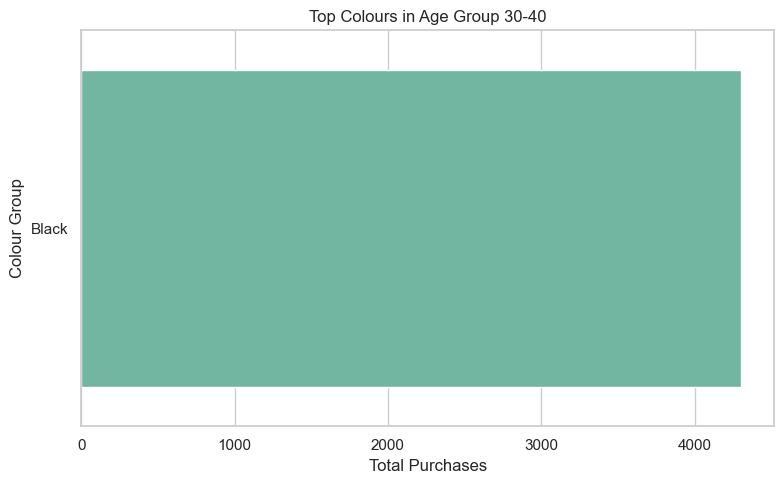

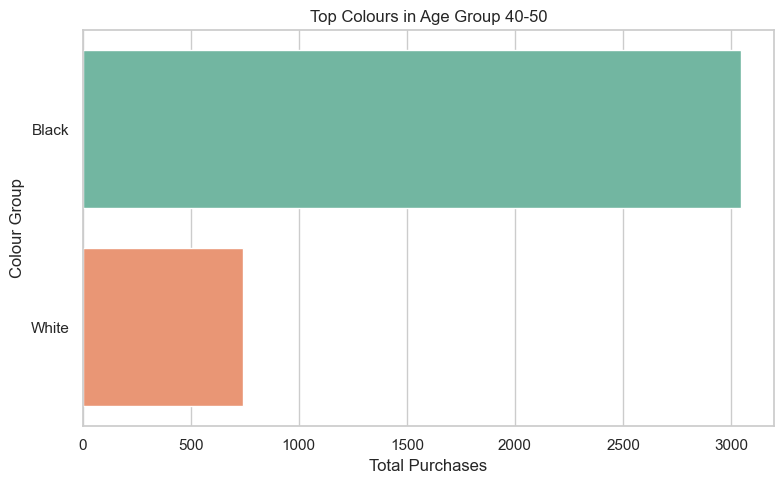

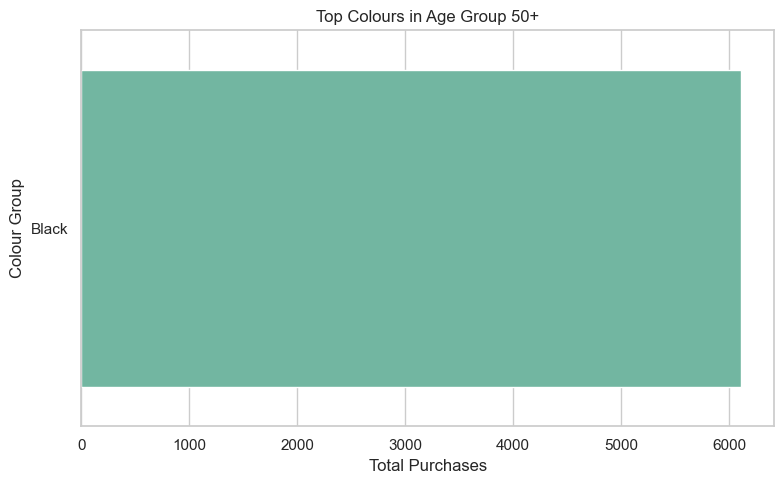

In [37]:
# Set style
sns.set(style="whitegrid")

# Unique age groups
age_groups = top5_with_meta['age_group'].unique()

for age in age_groups:
    # Filter data for this age group
    df_age = top5_with_meta[top5_with_meta['age_group'] == age]

    # Group by colour and sum purchases
    top_colours = (
        df_age.groupby('colour_group_name')['purchase_count']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .reset_index()
    )

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=top_colours,
        x='purchase_count',
        y='colour_group_name',
        palette='Set2'  # You can replace with your real_colour_mapping if needed
    )

    plt.title(f"Top Colours in Age Group {age}")
    plt.xlabel("Total Purchases")
    plt.ylabel("Colour Group")
    plt.tight_layout()
    plt.show()


All AGegroup prefer more of Black colour

### Seasonal

In [38]:
# Function to assign season based on month
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:  # months 12, 1, 2
        return 'Winter'

# Apply function
df['season'] = df['t_dat'].apply(get_season)

In [39]:
df.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_type_name', 'product_group_name', 'graphical_appearance_name',
       'colour_group_name', 'index_name', 'section_name', 'garment_group_name',
       'season'],
      dtype='object')

In [40]:
# Group by season and product type, summing purchases
season_product_counts = (
    df.groupby(['season', 'product_type_name'])
    .size()
    .reset_index(name='purchase_count')
)

# Get top product type for each season
top_product_per_season = (
    season_product_counts
    .sort_values(['season', 'purchase_count'], ascending=[True, False])
    .groupby('season')
    .head(1)
    .reset_index(drop=True)
)

print(top_product_per_season)


   season product_type_name  purchase_count
0  Autumn           Sweater         1323092
1  Spring          Trousers         1061092
2  Summer             Dress         1208295
3  Winter          Trousers          994470


We can see very obvious pattern in the most sold article in the season.
Summers, customers go for Dresses while in Autumn customers prepareing for Winters buy more Sweaters.
Trousers are all time product of H&M

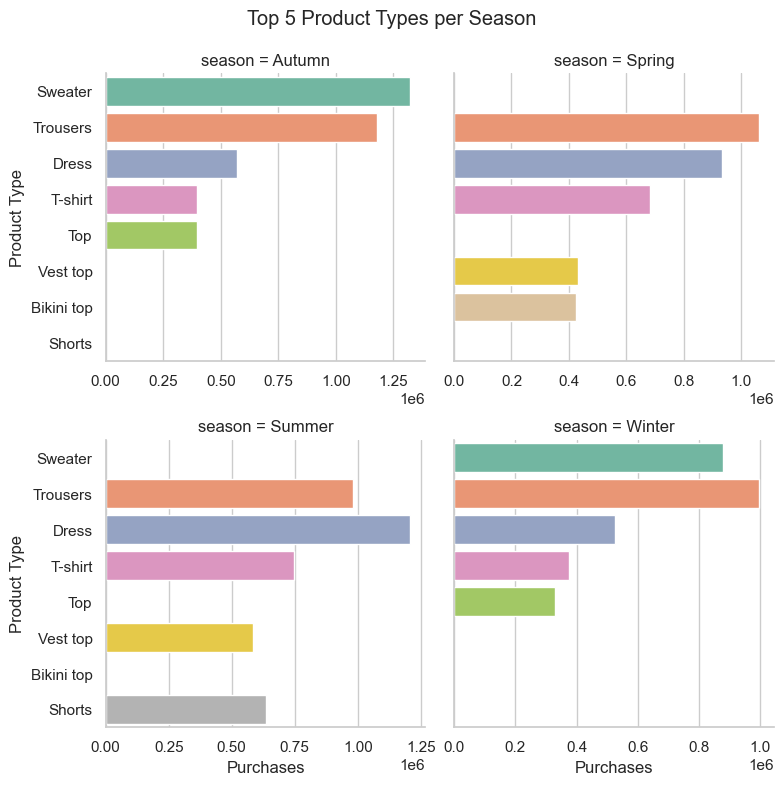

In [41]:
# Group and count purchases per product type per season
season_product_counts = (
    df.groupby(['season', 'product_type_name'])
    .size()
    .reset_index(name='purchase_count')
)

# Sort and get top 5 product types per season
top5_products_per_season = (
    season_product_counts
    .sort_values(['season', 'purchase_count'], ascending=[True, False])
    .groupby('season')
    .head(5)
    .reset_index(drop=True)
)
g = sns.catplot(
    data=top5_products_per_season,
    kind="bar",
    x="purchase_count",
    y="product_type_name",
    col="season",
    col_wrap=2,
    sharex=False,
    height=4,
    palette="Set2"
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 5 Product Types per Season")
g.set_axis_labels("Purchases", "Product Type")
plt.show()


In [42]:
# Sort by date to maintain time order
df = df.sort_values('t_dat')

# Step 2: Split into train (e.g. 80%) and test (20%) based on time
cutoff_date = df['t_dat'].quantile(0.8)
train_df = df[df['t_dat'] <= cutoff_date]
test_df = df[df['t_dat'] > cutoff_date]

### Top 10 articles

In [43]:
# Count number of purchases per article
article_popularity = (
    train_df.groupby('article_id')
    .size()
    .reset_index(name='purchase_count')
    .sort_values('purchase_count', ascending=False)
)

# Top N popular articles
top_n = 10
top_articles = article_popularity['article_id'].head(top_n).tolist()


In [44]:
# Unique test users
test_users = test_df['customer_id'].unique()

# Create recommendations for each test user
recommendations = pd.DataFrame({
    'customer_id': test_users.repeat(top_n),
    'predicted_article_id': top_articles * len(test_users)
})


In [45]:
recommendations

,customer_id,predicted_article_id
0,a6e203d474b7fb96604c477c37771df890822b08a0c83a...,706016001
1,a6e203d474b7fb96604c477c37771df890822b08a0c83a...,706016002
2,a6e203d474b7fb96604c477c37771df890822b08a0c83a...,372860001
3,a6e203d474b7fb96604c477c37771df890822b08a0c83a...,610776002
4,a6e203d474b7fb96604c477c37771df890822b08a0c83a...,399223001
...,...,...
6571655,54417f21fc7142adf6ab87d63ed3fa925bae4825a0c869...,464297007
6571656,54417f21fc7142adf6ab87d63ed3fa925bae4825a0c869...,562245001
6571657,54417f21fc7142adf6ab87d63ed3fa925bae4825a0c869...,759871002
6571658,54417f21fc7142adf6ab87d63ed3fa925bae4825a0c869...,156231001


##### Precision on Test split

In [46]:
# Actual purchases in test set
actual_purchases = test_df[['customer_id', 'article_id']].drop_duplicates()

# Merge with recommendations to check hits
hits = pd.merge(recommendations, actual_purchases, 
                left_on=['customer_id', 'predicted_article_id'], 
                right_on=['customer_id', 'article_id'], 
                how='inner')

# Precision@10
precision = hits.groupby('customer_id').size().mean() / top_n
print(f"Precision@{top_n}: {precision:.4f}")


Precision@10: 0.1068
